In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## Quick overview of the data

In [331]:
df = pd.read_csv("King_County_house_prices_dataset.csv")
df["price"] = df["price"].apply(lambda x: x*0.001)
df["bathrooms"] = df["bathrooms"].apply(lambda x: round(x))
df["sqft_lot"] = df["sqft_lot"].apply(lambda x: x*0.001)
df["sqft_living"] = df["sqft_living"].apply(lambda x: x*0.001)
df["sqft_above"] = df["sqft_above"].apply(lambda x: x*0.001)
df["sqft_living15"] = df["sqft_living15"].apply(lambda x: x*0.001)
df["sqft_lot15"] = df["sqft_lot15"].apply(lambda x: x*0.001)

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.9,3,1,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.0,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.0,3,2,2.57,7.242,2.0,0.0,0.0,...,7,2.17,400.0,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.0,2,1,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.0,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.0,4,3,1.96,5.000,1.0,0.0,0.0,...,7,1.05,910.0,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.0,3,2,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.0,1987,0.0,98074,47.6168,-122.045,1.80,7.503


Price is in thousand dollars!
all sqft-values in thousand sqft!

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  int64  
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Missing values

In [11]:
# waterfront, view, yr_renovated have null values

In [223]:
print("view, ",df.view.unique())
print("waterfront, ",df.waterfront.unique())
print("yr_renovated, ",df.yr_renovated.unique())

view,  [ 0. nan  3.  4.  2.  1.]
waterfront,  [nan  0.  1.]
yr_renovated,  [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [224]:
# check, how many nan values are in the data set

In [225]:
print("view: ", df.query("view == 'nan'").id.count())
print("waterfront: ", df.query("waterfront == 'nan'").id.count())
print("yr_renovated: ",df.query("yr_renovated == 'nan'").id.count())

view:  63
waterfront:  2376
yr_renovated:  3842


## Assumptions

#1: There is a correlation between the price and the grade
    If you are looking for a cheap house, go for a low grade
    If you have a high rate, you can prob sell it for a good price

#2: There is a correlation between the price and the footage of the home/lot
    If you are looking for a cheap house, go for a low footage
    If you have a high footage, you can prob sell it for a higher price

#3: There is a correlation between the price and the zip code
    Are there neighbourhoods, where prices are significantly higher?

#4: There is a correlation between the price and the condition
    If you are looking for a cheap house, go for a bad condition
    If you have a good condition, you can prob sell it for a good price

#5  There is a correlation between the price and the number of bed/bathrooms

## Visualization of house prices

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

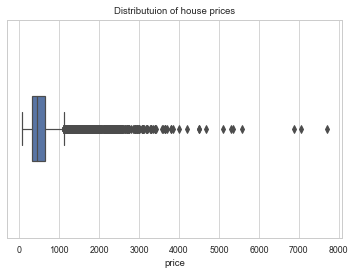

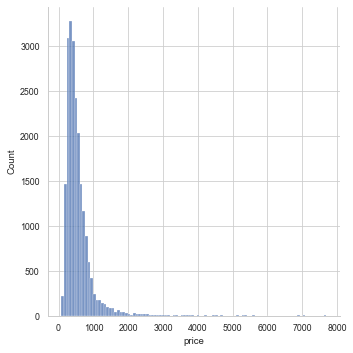

In [167]:
sns.boxplot( x=df["price"], width=0.3).set_title('Distributuion of house prices');
sns.displot(df, x=df["price"], bins=100);
df.price.describe()

## Visualizations

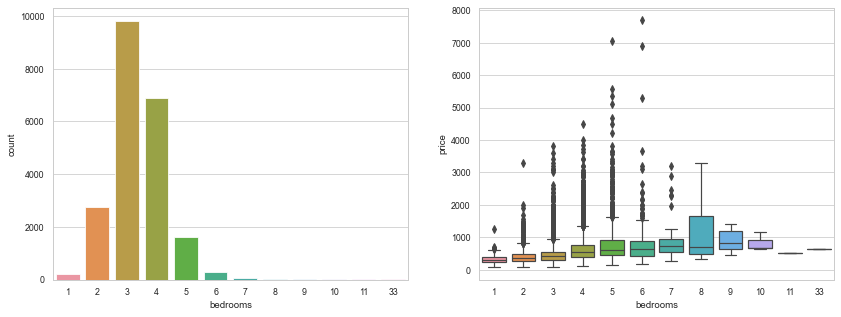

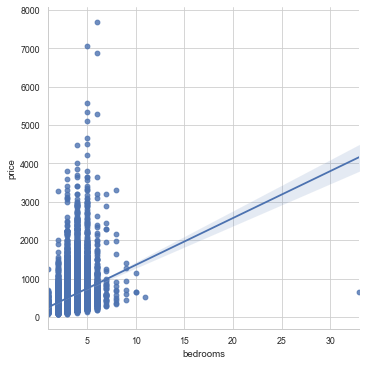

In [316]:
warnings.filterwarnings('ignore')

bedrooms = df["bedrooms"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='bedrooms', data=df, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=df, ax=ax[1])
plt.show()


sns.lmplot('bedrooms', 'price',data=df);

#sns.displot(data=df, x=df["bedrooms"], bins=10);

bedrooms = 33 seems to be strange

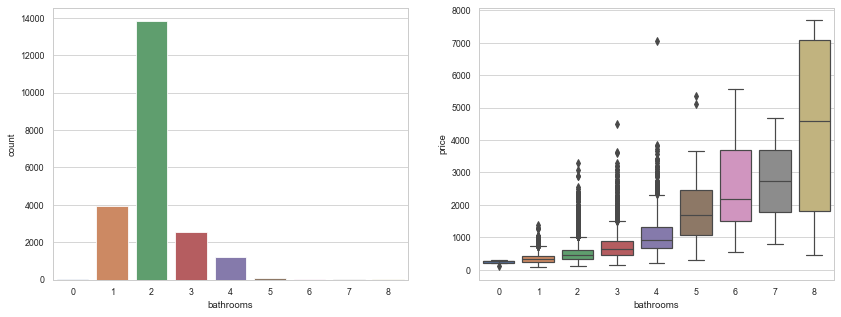

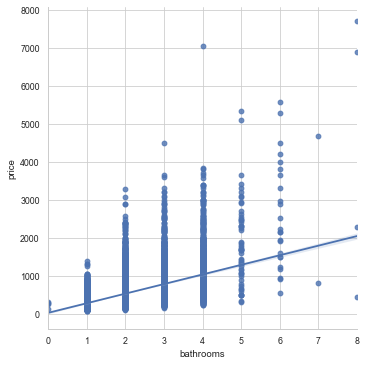

In [317]:
warnings.filterwarnings('ignore')

bathrooms = df["bathrooms"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='bathrooms', data=df, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=df, ax=ax[1])
plt.show()

sns.lmplot('bathrooms', 'price',data=df);


#sns.displot(data=df, x=df["bathrooms"],  bins=10);

count    21597.000000
mean         2.080322
std          0.918106
min          0.370000
25%          1.430000
50%          1.910000
75%          2.550000
max         13.540000
Name: sqft_living, dtype: float64

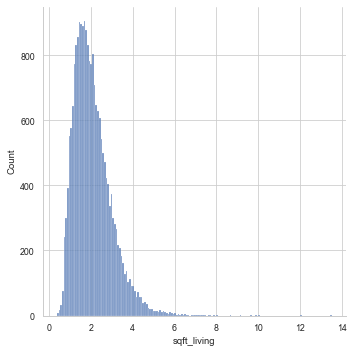

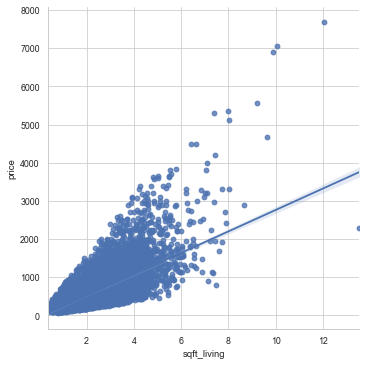

In [333]:
warnings.filterwarnings('ignore')

sns.displot(data=df, x=df["sqft_living"]);

sns.lmplot('sqft_living', 'price',data=df);
df.sqft_living.describe()

Living on more than 10.000 sqft seems strange

count    21597.000000
mean        15.099409
std         41.412637
min          0.520000
25%          5.040000
50%          7.618000
75%         10.685000
max       1651.359000
Name: sqft_lot, dtype: float64

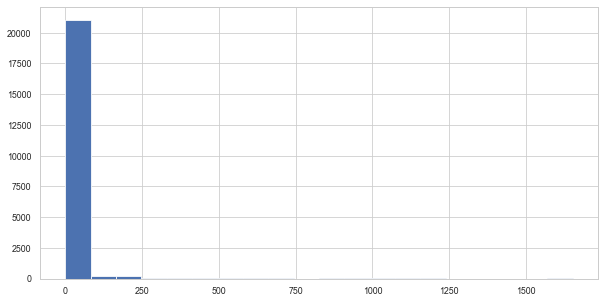

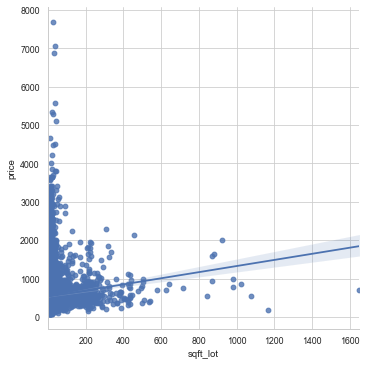

In [334]:
warnings.filterwarnings('ignore')

#sns.displot(data=df, x=df["sqft_lot"]);
df.sqft_lot.hist(bins=20, figsize=(10,5))

sns.lmplot('sqft_lot', 'price',data=df);

df.sqft_lot.describe()

there seems to be one outlier here

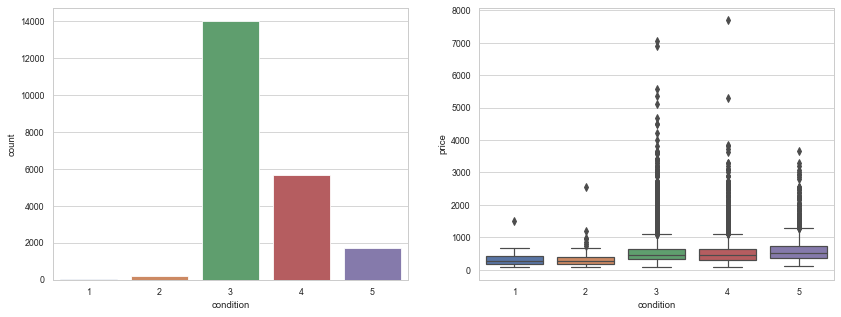

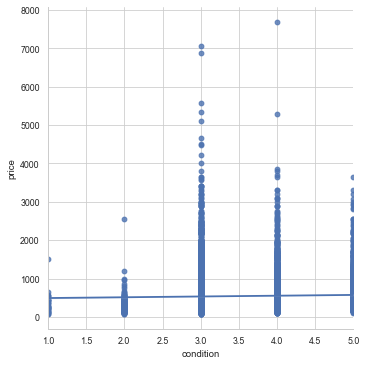

In [251]:
warnings.filterwarnings('ignore')

condition = df["condition"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=df, ax=ax[1])
plt.show()

sns.lmplot('condition', 'price',data=df);

#sns.displot(data=df, x=df["condition"], bins=10);

In avergae condition 5 gets highest prices, but there are many outliers (especially in condition 3 and 4)

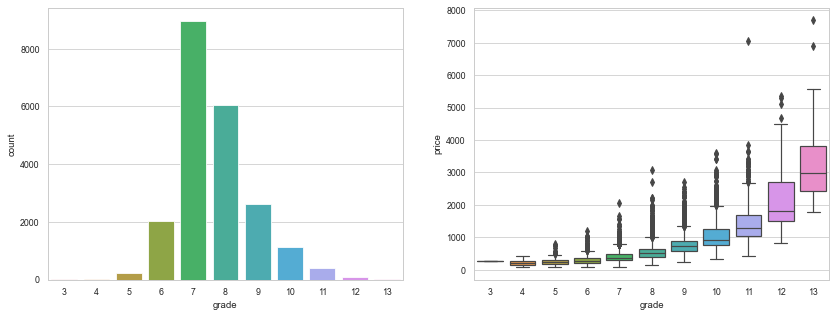

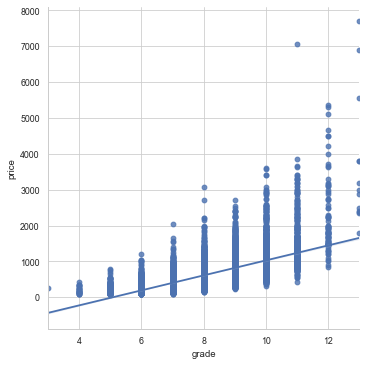

In [252]:
warnings.filterwarnings('ignore')

grade = df["grade"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='grade', data=df, ax=ax[0])
sns.boxplot(x='grade', y= 'price',
            data=df, ax=ax[1])
plt.show()

sns.lmplot('grade', 'price',data=df);

In [261]:
top_price_by_zip1 = df.groupby("zipcode").price.mean().sort_values(ascending=False).head(10).reset_index()
top_price_by_zip2 = df.groupby("zipcode").price.median().sort_values(ascending=False).head(10).reset_index()


In [271]:
top_prices = top_price_by_zip1.join(top_price_by_zip2, lsuffix="mean", rsuffix="median")
top_prices

,zipcodemean,pricemean,zipcodemedian,pricemedian
0,98039,2161.300000,98039,1895.0000
1,98004,1356.523991,98004,1150.0000
2,98040,1194.873638,98040,993.7500
3,98112,1096.239007,98112,915.0000
4,98102,899.607673,98005,765.4750
5,98109,880.077752,98006,760.1845
6,98105,863.228943,98119,744.9750
7,98006,859.938554,98075,739.9990
8,98119,849.714810,98109,736.0000
9,98005,810.289696,98102,710.0000


In [335]:
low_price_by_zip1 = df.groupby("zipcode").price.mean().sort_values(ascending=True).head(10).reset_index()
low_price_by_zip2 = df.groupby("zipcode").price.median().sort_values(ascending=True).head(10).reset_index()

In [337]:
low_prices = low_price_by_zip1.join(low_price_by_zip2, lsuffix="mean", rsuffix="median")
low_prices

,zipcodemean,pricemean,zipcodemedian,pricemedian
0,98002,234.284035,98002,235.000
1,98168,240.328372,98168,235.000
2,98032,251.296240,98032,249.000
3,98001,281.194870,98001,260.000
4,98148,284.908596,98188,264.000
5,98023,286.742812,98198,265.000
6,98188,289.078346,98003,267.475
7,98003,294.111279,98023,268.450
8,98030,296.187980,98148,278.000
9,98031,300.340403,98178,278.277


## Heatmap, to figure out if I missed a correlation

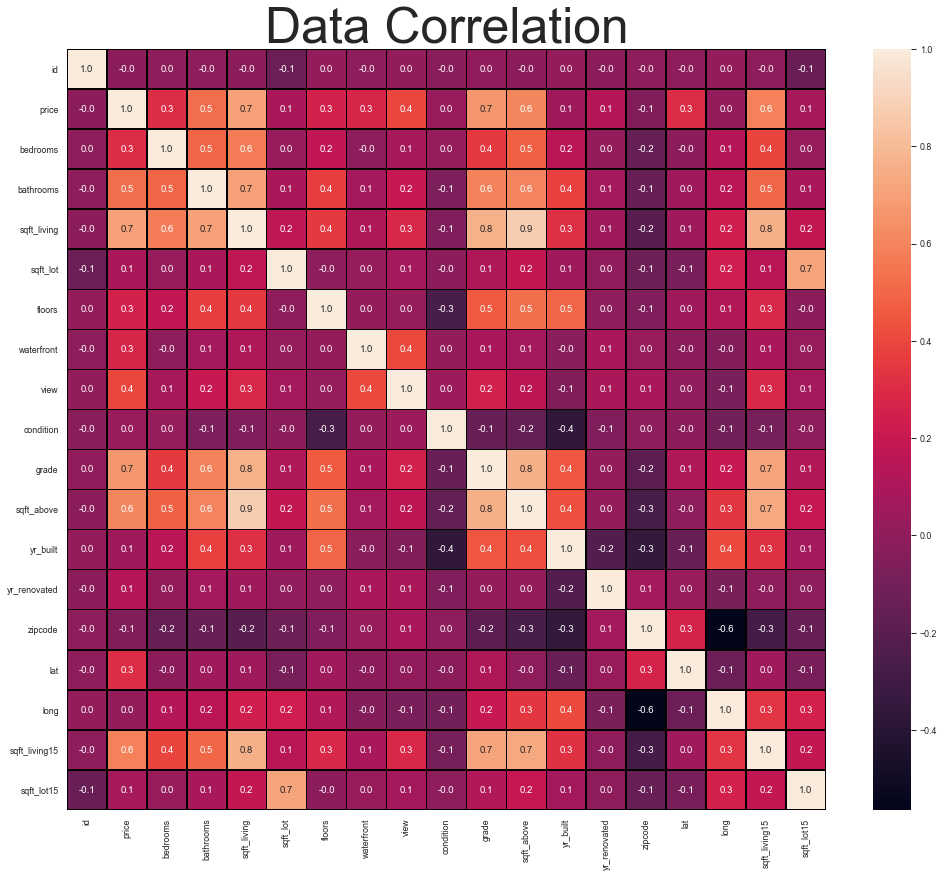

In [322]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

add sqft_above, sqft_living15 and remove sqft_lot, bathrooms

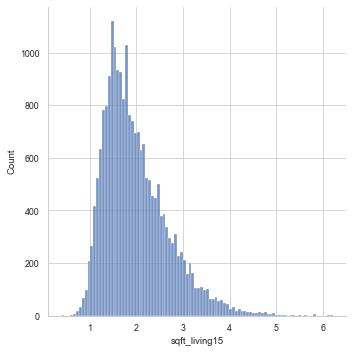

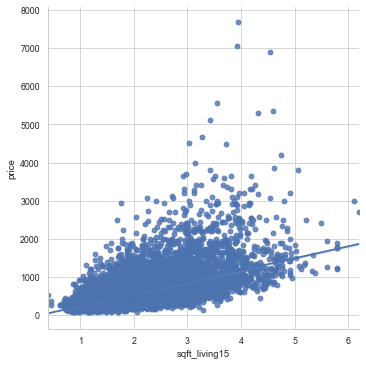

In [323]:
warnings.filterwarnings('ignore')

sns.displot(data=df, x=df["sqft_living15"]);

sns.lmplot('sqft_living15', 'price',data=df);

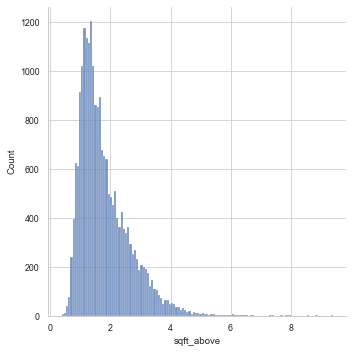

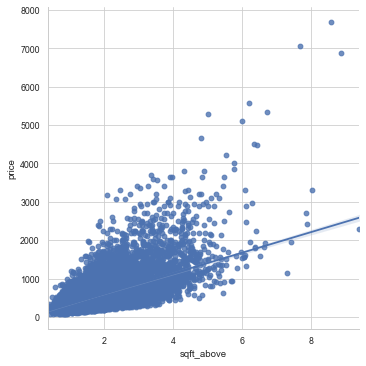

In [324]:
warnings.filterwarnings('ignore')

sns.displot(data=df, x=df["sqft_above"]);

sns.lmplot('sqft_above', 'price',data=df);

## Outliers

identified outliers: bedrooms, sqft_living and sqft_lot

In [325]:
df2 = df.copy()
df2 = df2.query("bedrooms < 33 and sqft_living < 10 and sqft_lot < 1200")


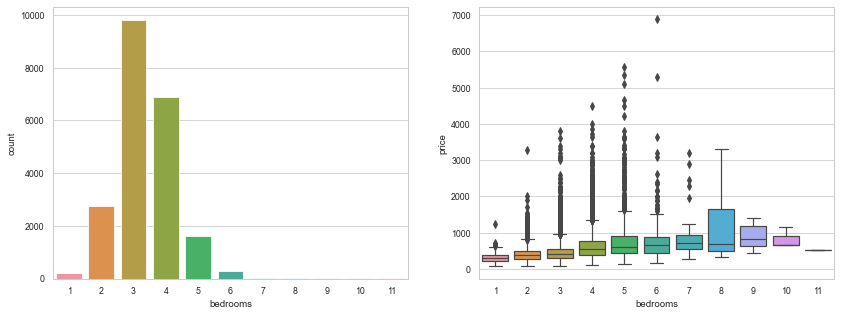

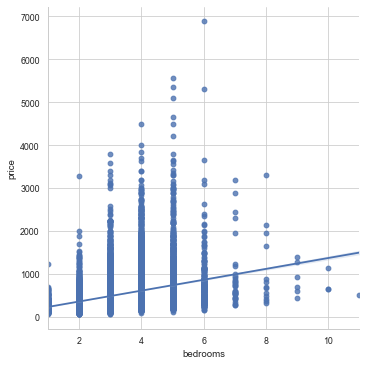

In [326]:
warnings.filterwarnings('ignore')

bedrooms = df2["bedrooms"].value_counts()

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='bedrooms', data=df2, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=df2, ax=ax[1])
plt.show()


sns.lmplot('bedrooms', 'price',data=df2);

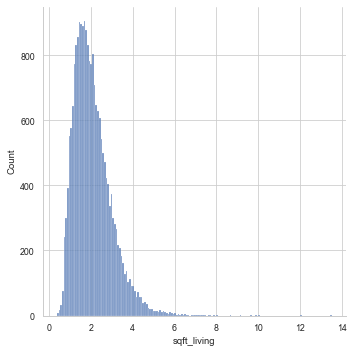

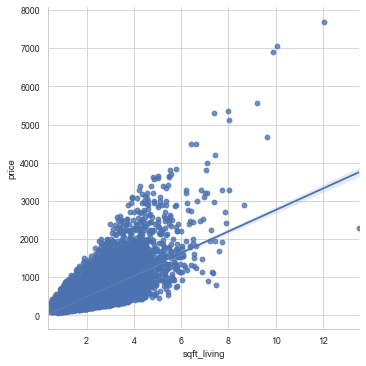

In [329]:
warnings.filterwarnings('ignore')

sns.displot(data=df, x=df["sqft_living"]);

sns.lmplot('sqft_living', 'price',data=df);

### First conclusion:

From my first assumptions, I remove my focus from bedrooms, condition and sqft_lot and instead include sqft_living15 and sqft_above 

### Recommendations based on first draft of EDA:

#### Seller

#1: The bigger the footage of the home, the more likely you will get a higher price than in comparison to smaller footage of the home

#2: If you have more than 4 bathrooms, it is likely that you get a price fr your house, which is above the average price (540k)

#3: Try to get a nice rating, this will increase the likelihood to get a good deal! (A grade of 8 would be a good start)

#4: Take a look at your neighboourhood: The bigger the living space of your neighbours, the better your position.

#5: If your house is in one of the below areas, it is more likely to get a price over the average than in other areas!

In [332]:
top_prices

,zipcodemean,pricemean,zipcodemedian,pricemedian
0,98039,2161.300000,98039,1895.0000
1,98004,1356.523991,98004,1150.0000
2,98040,1194.873638,98040,993.7500
3,98112,1096.239007,98112,915.0000
4,98102,899.607673,98005,765.4750
5,98109,880.077752,98006,760.1845
6,98105,863.228943,98119,744.9750
7,98006,859.938554,98075,739.9990
8,98119,849.714810,98109,736.0000
9,98005,810.289696,98102,710.0000


#### Buyer

#1: 75% of the objects are in a price range from 78k to 645k. If your budget looks aprox. like this, you very likely find a new home

#2: Dont be afraid to get a look into big properties, because a high footage of the lot is not necessarily a indicator for a high price

#3: If you look into these areas, you are likely to buy a house under the average price


In [338]:
low_prices

,zipcodemean,pricemean,zipcodemedian,pricemedian
0,98002,234.284035,98002,235.000
1,98168,240.328372,98168,235.000
2,98032,251.296240,98032,249.000
3,98001,281.194870,98001,260.000
4,98148,284.908596,98188,264.000
5,98023,286.742812,98198,265.000
6,98188,289.078346,98003,267.475
7,98003,294.111279,98023,268.450
8,98030,296.187980,98148,278.000
9,98031,300.340403,98178,278.277
